In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import random
import sys
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
random.seed(10)

In [2]:
def ksample(seql,k,testflag=False):        #taking sequence length and assigning random number at k position
    kint = 0
    x = torch.zeros(seql,10)
    for i in range (0,seql):
        randint = random.randint(0,9)
        if(i==k-1):
            kint = randint
        if testflag:
            sys.stdout.write(str(randint)+'')
        x[i,randint-1]=1
    if testflag:
        sys.stdout.write('--> ' + str(kint) + '\n')
    x=x.unsqueeze(1) #extra dimension for Batch
    y=torch.tensor([kint])
    #print(randint)
    return x,y   
        

In [3]:
ksample(5,4)

(tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
 
         [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]]), tensor([7]))

In [4]:
class Memorize(nn.Module):
    def __init__(self,statedim):
        super (Memorize,self).__init__()
        self.statedim = statedim
        self.inputdim = 10
        self.outputdim = 10
        self.lstm = nn.LSTM(self.inputdim,self.statedim)
        self.outputLayer = nn.Linear(self.statedim,self.outputdim)
        self.softmax = nn.Softmax()
        
    def forward(self,x):
        lstmout,_ = self.lstm(x)
        L,B,D = lstmout.size(0),lstmout.size(1),lstmout.size(2)
        #print(L,B,D)
        lstmout_lastTimeStep = lstmout[L-1,0,:]
        #print(lstmout_lastTimeStep.size())
        outputLayerActivations = self.outputLayer(lstmout_lastTimeStep)
        outputsoftmax = self.softmax
        return outputLayerActivations.unsqueeze(0)

In [21]:
modelroot =('/home/rishabh/Documents/ATSP assignment3/Kletter/hs10')
torch.save(model.state_dict(), modelroot)

In [28]:
statesize = 5
k = 2
minseqlength = 3
maxseqlength = 10

#create model
model = Memorize(statesize)
print('Model Initialized')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

iterations = 200
min_epoch = 200
num_epoch = 0
tot_loss = 0
acc = 0
list= [];
accuracy=[];

while(num_epoch<min_epoch):
    
    num_epoch = num_epoch+1
    tot_loss = 0
    correct = 0
    for i in range(0,iterations):
        seqlength = random.randint(minseqlength,maxseqlength)
        x,y = ksample(seqlength,k)
        model.zero_grad()
        pred = model(x)
        #accuracy
        _,predicted = torch.max(pred.data,1)
        correct+=(predicted==y).sum().item() 
        #loss
        loss = criterion(pred,y)
        tot_loss = tot_loss+loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = correct/iterations 
    accuracy.append(acc)
    print("Test accuracy for %d epoch is: %1f"%(num_epoch,acc))
    
    totalloss = tot_loss/iterations
    print("epoch[%d/%d] Avg loss for last 500 samples  = [%1f]"%(num_epoch,min_epoch,totalloss))
    list.append(totalloss)
        
print('Training Finished')      
        

Model Initialized
Test accuracy for 1 epoch is: 0.090000
epoch[1/200] Avg loss for last 500 samples  = [2.330470]
Test accuracy for 2 epoch is: 0.095000
epoch[2/200] Avg loss for last 500 samples  = [2.320954]
Test accuracy for 3 epoch is: 0.075000
epoch[3/200] Avg loss for last 500 samples  = [2.314165]
Test accuracy for 4 epoch is: 0.125000
epoch[4/200] Avg loss for last 500 samples  = [2.305554]
Test accuracy for 5 epoch is: 0.090000
epoch[5/200] Avg loss for last 500 samples  = [2.315563]
Test accuracy for 6 epoch is: 0.105000
epoch[6/200] Avg loss for last 500 samples  = [2.304618]
Test accuracy for 7 epoch is: 0.095000
epoch[7/200] Avg loss for last 500 samples  = [2.311046]
Test accuracy for 8 epoch is: 0.095000
epoch[8/200] Avg loss for last 500 samples  = [2.303854]
Test accuracy for 9 epoch is: 0.135000
epoch[9/200] Avg loss for last 500 samples  = [2.292305]
Test accuracy for 10 epoch is: 0.130000
epoch[10/200] Avg loss for last 500 samples  = [2.293884]
Test accuracy for 11

Test accuracy for 85 epoch is: 0.385000
epoch[85/200] Avg loss for last 500 samples  = [1.753182]
Test accuracy for 86 epoch is: 0.430000
epoch[86/200] Avg loss for last 500 samples  = [1.700023]
Test accuracy for 87 epoch is: 0.400000
epoch[87/200] Avg loss for last 500 samples  = [1.838397]
Test accuracy for 88 epoch is: 0.470000
epoch[88/200] Avg loss for last 500 samples  = [1.608478]
Test accuracy for 89 epoch is: 0.380000
epoch[89/200] Avg loss for last 500 samples  = [1.738594]
Test accuracy for 90 epoch is: 0.380000
epoch[90/200] Avg loss for last 500 samples  = [1.748510]
Test accuracy for 91 epoch is: 0.375000
epoch[91/200] Avg loss for last 500 samples  = [1.718382]
Test accuracy for 92 epoch is: 0.390000
epoch[92/200] Avg loss for last 500 samples  = [1.721010]
Test accuracy for 93 epoch is: 0.370000
epoch[93/200] Avg loss for last 500 samples  = [1.814885]
Test accuracy for 94 epoch is: 0.435000
epoch[94/200] Avg loss for last 500 samples  = [1.668875]
Test accuracy for 95

Test accuracy for 168 epoch is: 0.555000
epoch[168/200] Avg loss for last 500 samples  = [1.431393]
Test accuracy for 169 epoch is: 0.480000
epoch[169/200] Avg loss for last 500 samples  = [1.508542]
Test accuracy for 170 epoch is: 0.495000
epoch[170/200] Avg loss for last 500 samples  = [1.535550]
Test accuracy for 171 epoch is: 0.455000
epoch[171/200] Avg loss for last 500 samples  = [1.486591]
Test accuracy for 172 epoch is: 0.505000
epoch[172/200] Avg loss for last 500 samples  = [1.470754]
Test accuracy for 173 epoch is: 0.425000
epoch[173/200] Avg loss for last 500 samples  = [1.702318]
Test accuracy for 174 epoch is: 0.490000
epoch[174/200] Avg loss for last 500 samples  = [1.523741]
Test accuracy for 175 epoch is: 0.490000
epoch[175/200] Avg loss for last 500 samples  = [1.538252]
Test accuracy for 176 epoch is: 0.490000
epoch[176/200] Avg loss for last 500 samples  = [1.550295]
Test accuracy for 177 epoch is: 0.495000
epoch[177/200] Avg loss for last 500 samples  = [1.413901]


Text(0,0.5,'loss')

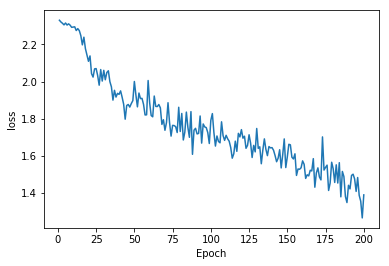

In [29]:
x = np.arange(1,min_epoch+1)
plt.plot(x,list)
plt.xlabel('Epoch')
plt.ylabel('loss')

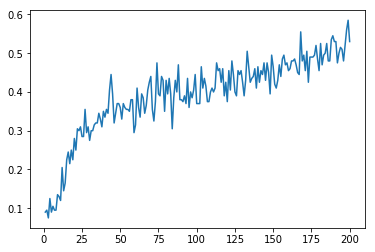

In [30]:
x = np.arange(1,min_epoch+1)
plt.plot(x,accuracy)


In [24]:
for i in range(5):
    
    testsq = (5+i)
    x,y = ksample(testsq,k,testflag = True)
    pred = model(x)
    #print(pred)
    
    indx = torch.argmax(pred)


36939--> 6
565278--> 6
5260440--> 2
65057805--> 5
591219579--> 9
